In [ ]:
# ================================================================
# Exemplos numéricos — Regressão Poisson (um único dataset por cenário)
# ================================================================

set.seed(123)

# Parâmetros fixos
n = 200
beta0 = 1
alpha = 0.05

# Gera a covariável (mesma x para todos os cenários p/ comparabilidade)
x = runif(n, 0, 2)

# Função auxiliar: ajusta GLM Poisson e testa H0: beta1 = 0 em UM dataset
teste_poisson = function(y, x) {
  # Modelo completo e reduzido
  m_full = glm(y ~ x, family = poisson)
  m_red  = glm(y ~ 1, family = poisson)

  # Razão de verossimilhanças (LR) ~ Chi2_1 sob H0
  LR = 2 * (logLik(m_full)[1] - logLik(m_red)[1])
  p_lr = 1 - pchisq(LR, df = 1)

  # Wald para beta1: (beta1_hat / se)^2 ~ Chi2_1 sob H0
  b1_hat = coef(m_full)[2]
  se_b1  = sqrt(vcov(m_full)[2, 2])
  W = (b1_hat / se_b1)^2
  p_w = 1 - pchisq(W, df = 1)

  c(p_lr = p_lr, p_w = p_w, beta1_hat = b1_hat, se_b1 = se_b1, LR = LR, W = W)
}

# ------------------------------
# Cenário A — H0 verdadeira
# ------------------------------
beta1_A = 0.00
lambda_A = exp(beta0 + beta1_A * x)
y_A = rpois(n, lambda = lambda_A)

res_A = teste_poisson(y_A, x)

# ------------------------------
# Cenário B — H0 falsa (efeito fraco)
# ------------------------------
beta1_B = 0.15
lambda_B = exp(beta0 + beta1_B * x)
y_B = rpois(n, lambda = lambda_B)

res_B = teste_poisson(y_B, x)

# ------------------------------
# Cenário C — H0 falsa (efeito forte)
# ------------------------------
beta1_C = 0.60
lambda_C = exp(beta0 + beta1_C * x)
y_C = rpois(n, lambda = lambda_C)

res_C = teste_poisson(y_C, x)

# Mostra um resumo comparando os três cenários
round(rbind(
  "Cenário A (H0 verdadeira, beta1=0.00)" = res_A,
  "Cenário B (H0 falsa, beta1=0.15)"      = res_B,
  "Cenário C (H0 falsa, beta1=0.60)"      = res_C
), 4)d

,p_lr,p_w.x,beta1_hat.x,se_b1,LR,W.x
"Cenário A (H0 verdadeira, beta1=0.00)",0.2100,0.2104,-0.0992,0.0792,1.5717,1.5683
"Cenário B (H0 falsa, beta1=0.15)",0.1676,0.1675,0.0998,0.0723,1.9043,1.9053
"Cenário C (H0 falsa, beta1=0.60)",0.0000,0.0000,0.6242,0.0579,119.0368,116.1481


In [6]:
# ================================================================
# Exemplos numéricos — Regressão Poisson (um único dataset por cenário)
# ================================================================

set.seed(123)

# Parâmetros fixos
n = 200
beta0 = 1
alpha = 0.05

# Gera a covariável (mesma x para todos os cenários p/ comparabilidade)
x = runif(n, 0, 2)

# Função auxiliar: ajusta GLM Poisson e testa H0: beta1 = 0 em UM dataset
teste_poisson = function(y, x) {
  # Modelo completo e reduzido
  m_full = glm(y ~ x, family = poisson)
  m_red  = glm(y ~ 1, family = poisson)

  # Razão de verossimilhanças (LR) ~ Chi2_1 sob H0
  LR = 2 * (logLik(m_full)[1] - logLik(m_red)[1])
  p_LR = 1 - pchisq(LR, df = 1)

  # Wald para beta1: (beta1_hat / se)^2 ~ Chi2_1 sob H0
  beta1_hat = coef(m_full)[2]
  se_beta1  = sqrt(vcov(m_full)[2, 2])
  W = (beta1_hat / se_beta1)^2
  p_W = 1 - pchisq(W, df = 1)

  data.frame(
    p_LR = p_LR,
    p_W = p_W,
    beta1_hat = beta1_hat,
    se_beta1 = se_beta1,
    LR = LR,
    W = W
  )
}

# ------------------------------
# Cenário A — H0 verdadeira
# ------------------------------
beta1_A = 0.00
lambda_A = exp(beta0 + beta1_A * x)
y_A = rpois(n, lambda = lambda_A)
res_A = teste_poisson(y_A, x)

# ------------------------------
# Cenário B — H0 falsa (efeito fraco)
# ------------------------------
beta1_B = 0.15
lambda_B = exp(beta0 + beta1_B * x)
y_B = rpois(n, lambda = lambda_B)
res_B = teste_poisson(y_B, x)

# ------------------------------
# Cenário C — H0 falsa (efeito forte)
# ------------------------------
beta1_C = 0.60
lambda_C = exp(beta0 + beta1_C * x)
y_C = rpois(n, lambda = lambda_C)
res_C = teste_poisson(y_C, x)

# Junta os resultados
resumo = rbind(
  "Cenário A (H0 verdadeira, beta1=0.00)" = res_A,
  "Cenário B (H0 falsa, beta1=0.15)"      = res_B,
  "Cenário C (H0 falsa, beta1=0.60)"      = res_C
)

# Mostra arredondado
round(resumo, 4)

,p_LR,p_W,beta1_hat,se_beta1,LR,W
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"Cenário A (H0 verdadeira, beta1=0.00)",0.2100,0.2104,-0.0992,0.0792,1.5717,1.5683
"Cenário B (H0 falsa, beta1=0.15)",0.1676,0.1675,0.0998,0.0723,1.9043,1.9053
"Cenário C (H0 falsa, beta1=0.60)",0.0000,0.0000,0.6242,0.0579,119.0368,116.1481


In [7]:
# ================================================================
# Exemplos numéricos — Regressão Poisson (um único dataset por cenário)
# ================================================================

set.seed(123)

# Parâmetros fixos
n = 200
beta0 = 1
alpha = 0.05

# Gera a covariável (mesma x para todos os cenários p/ comparabilidade)
x = runif(n, 0, 2)

# ---------------------------------------------------------------
# Função auxiliar: ajusta GLM Poisson e testa H0: beta1 = 0
# ---------------------------------------------------------------
teste_poisson = function(y, x) {
  
  # Modelo completo e modelo reduzido
  modelo_completo = glm(y ~ x, family = poisson)
  modelo_reduzido = glm(y ~ 1, family = poisson)
  
  # Estatística da Razão de Verossimilhanças (LR)
  razao_verossimilhanca = 2 * (logLik(modelo_completo)[1] - logLik(modelo_reduzido)[1])
  p_valor_LR = 1 - pchisq(razao_verossimilhanca, df = 1)
  
  # Estatística de Wald
  beta1_estimado = coef(modelo_completo)[2]
  erro_padrao_beta1 = sqrt(vcov(modelo_completo)[2, 2])
  estatistica_Wald = (beta1_estimado / erro_padrao_beta1)^2
  p_valor_Wald = 1 - pchisq(estatistica_Wald, df = 1)
  
  # Retorna resultados
  data.frame(
    p_valor_LR = p_valor_LR,
    p_valor_Wald = p_valor_Wald,
    beta1_estimado = beta1_estimado,
    erro_padrao_beta1 = erro_padrao_beta1,
    estatistica_LR = razao_verossimilhanca,
    estatistica_Wald = estatistica_Wald
  )
}

# ------------------------------
# Cenário A — H0 verdadeira
# ------------------------------
beta1_A = 0.00
lambda_A = exp(beta0 + beta1_A * x)
y_A = rpois(n, lambda = lambda_A)
resultado_A = teste_poisson(y_A, x)

# ------------------------------
# Cenário B — H0 falsa (efeito fraco)
# ------------------------------
beta1_B = 0.15
lambda_B = exp(beta0 + beta1_B * x)
y_B = rpois(n, lambda = lambda_B)
resultado_B = teste_poisson(y_B, x)

# ------------------------------
# Cenário C — H0 falsa (efeito forte)
# ------------------------------
beta1_C = 0.60
lambda_C = exp(beta0 + beta1_C * x)
y_C = rpois(n, lambda = lambda_C)
resultado_C = teste_poisson(y_C, x)

# Junta os resultados
resumo_resultados = rbind(
  "Cenário A (H0 verdadeira, beta1=0.00)" = resultado_A,
  "Cenário B (H0 falsa, beta1=0.15)"      = resultado_B,
  "Cenário C (H0 falsa, beta1=0.60)"      = resultado_C
)

# Mostra arredondado
round(resumo_resultados, 4)

,p_valor_LR,p_valor_Wald,beta1_estimado,erro_padrao_beta1,estatistica_LR,estatistica_Wald
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"Cenário A (H0 verdadeira, beta1=0.00)",0.2100,0.2104,-0.0992,0.0792,1.5717,1.5683
"Cenário B (H0 falsa, beta1=0.15)",0.1676,0.1675,0.0998,0.0723,1.9043,1.9053
"Cenário C (H0 falsa, beta1=0.60)",0.0000,0.0000,0.6242,0.0579,119.0368,116.1481


In [8]:
# ================================================================
# Simulação simples — valor-p, decisão e comparação com valor real
# ================================================================

set.seed(123)

# Parâmetros
n = 200
beta0 = 1
alpha = 0.05        # nível de significância
beta_real = c(0, 0.2, 0.6)   # três valores reais para testar

# Covariável
x = runif(n, 0, 2)

# Função para gerar dados e calcular o valor-p
teste_simples = function(beta1_real) {
  lambda = exp(beta0 + beta1_real * x)
  y = rpois(n, lambda)
  modelo = glm(y ~ x, family = poisson)
  
  beta1_est = coef(modelo)[2]
  erro_beta1 = sqrt(vcov(modelo)[2, 2])
  z = beta1_est / erro_beta1
  p_valor = 2 * (1 - pnorm(abs(z)))    # teste bicaudal
  
  decisao = ifelse(p_valor < alpha, "Rejeita H0", "Não rejeita H0")
  
  data.frame(
    valor_p = round(p_valor, 4),
    decisao = decisao,
    beta1_estimado = round(beta1_est, 4),
    beta1_real = beta1_real
  )
}

# Executa os três cenários
resultados = do.call(rbind, lapply(beta_real, teste_simples))
rownames(resultados) = c("Cenário A", "Cenário B", "Cenário C")

print(resultados)

          valor_p        decisao beta1_estimado beta1_real
Cenário A  0.2104 Não rejeita H0        -0.0992        0.0
Cenário B  0.0617 Não rejeita H0         0.1318        0.2
Cenário C  0.0000     Rejeita H0         0.6242        0.6


Resultado do teste KS:

	Asymptotic one-sample Kolmogorov-Smirnov test

data:  valores_p
D = 0.0083031, p-value = 0.4957
alternative hypothesis: two-sided



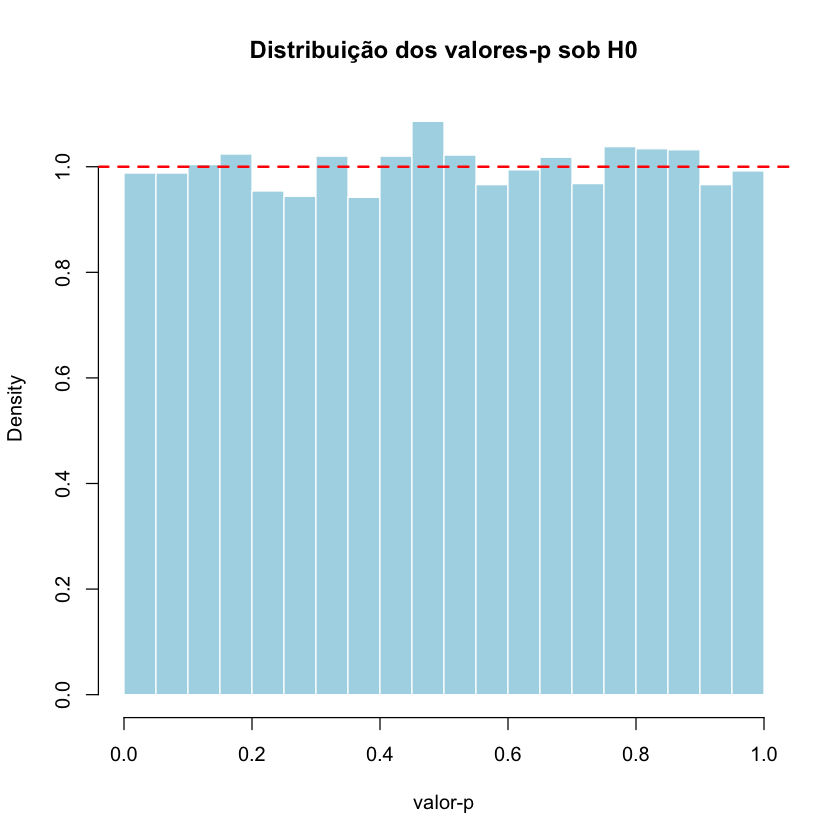

In [9]:
# ================================================================
# Teste da uniformidade dos valores-p sob H0
# ================================================================

set.seed(123)

# Parâmetros
n = 200
beta0 = 1
beta1 = 0      # H0 verdadeira
alpha = 0.05
M = 10000      # número de simulações

x = runif(n, 0, 2)
valores_p = numeric(M)

for (i in 1:M) {
  lambda = exp(beta0 + beta1 * x)
  y = rpois(n, lambda)
  modelo = glm(y ~ x, family = poisson)
  
  beta1_est = coef(modelo)[2]
  erro_beta1 = sqrt(vcov(modelo)[2, 2])
  z = beta1_est / erro_beta1
  valores_p[i] = 2 * (1 - pnorm(abs(z)))  # teste bicaudal
}

# Histograma visual
hist(valores_p, breaks = 30, prob = TRUE, main = "Distribuição dos valores-p sob H0",
     xlab = "valor-p", col = "lightblue", border = "white")
abline(h = 1, col = "red", lwd = 2, lty = 2)  # linha da densidade uniforme

# Teste KS contra U(0,1)
ks = ks.test(valores_p, "punif")

cat("Resultado do teste KS:\n")
print(ks)

In [1]:
# ================================================================
# Simulação simples — p-valor (Wald), decisão e comparação com valor real
# (GLM Poisson) — organizado por cenários
# ================================================================

set.seed(123)

# Parâmetros fixos
n = 200
beta0 = 1
alpha = 0.05   # nível de significância

# Mesma covariável para todos os cenários (comparabilidade)
x = runif(n, 0, 2)

# ---------------------------------------------------------------
# Função: ajusta GLM Poisson e testa H0: beta1 = 0 (Wald bicaudal)
# ---------------------------------------------------------------
teste_simples = function(y, x, beta1_real) {
  modelo = glm(y ~ x, family = poisson)

  beta1_estimado = coef(modelo)[2]
  erro_padrao    = sqrt(vcov(modelo)[2, 2])

  z       = beta1_estimado / erro_padrao
  valor_p = 2 * (1 - pnorm(abs(z)))   # bicaudal

  decisao = ifelse(valor_p < alpha, "Rejeita H0", "Não rejeita H0")

  data.frame(
    valor_p        = valor_p,
    decisao        = decisao,
    beta1_estimado = beta1_estimado,
    beta1_real     = beta1_real,
    row.names      = NULL
  )
}

# ------------------------------
# Cenário A — H0 verdadeira
# ------------------------------
beta1_A = 0.00
lambda_A = exp(beta0 + beta1_A * x)
y_A = rpois(n, lambda = lambda_A)
resultado_A = teste_simples(y_A, x, beta1_A)

# ------------------------------
# Cenário B — H0 falsa (efeito fraco)
# ------------------------------
beta1_B = 0.15
lambda_B = exp(beta0 + beta1_B * x)
y_B = rpois(n, lambda = lambda_B)
resultado_B = teste_simples(y_B, x, beta1_B)

# ------------------------------
# Cenário C — H0 falsa (efeito forte)
# ------------------------------
beta1_C = 0.60
lambda_C = exp(beta0 + beta1_C * x)
y_C = rpois(n, lambda = lambda_C)
resultado_C = teste_simples(y_C, x, beta1_C)

# ---------------------------------------------------------------
# Tabela final (com nomes de linhas por cenário + formatação)
# ---------------------------------------------------------------
tabela = rbind(
  "Cenário A (H0 verdadeira, beta1=0.00)" = resultado_A,
  "Cenário B (H0 falsa, beta1=0.15)"      = resultado_B,
  "Cenário C (H0 falsa, beta1=0.60)"      = resultado_C
)

# Formata para saída “bonita” no console
tabela_fmt = within(tabela, {
  valor_p        = sprintf("%.4f", valor_p)
  beta1_estimado = sprintf("%.4f", beta1_estimado)
  beta1_real     = sprintf("%.2f", beta1_real)
})
print(noquote(tabela_fmt))

                                      valor_p        decisao beta1_estimado
Cenário A (H0 verdadeira, beta1=0.00)  0.2104 Não rejeita H0        -0.0992
Cenário B (H0 falsa, beta1=0.15)       0.1675 Não rejeita H0         0.0998
Cenário C (H0 falsa, beta1=0.60)       0.0000     Rejeita H0         0.6242
                                      beta1_real
Cenário A (H0 verdadeira, beta1=0.00)       0.00
Cenário B (H0 falsa, beta1=0.15)            0.15
Cenário C (H0 falsa, beta1=0.60)            0.60


média(z) = 2.025  var(z) = 2.205402 


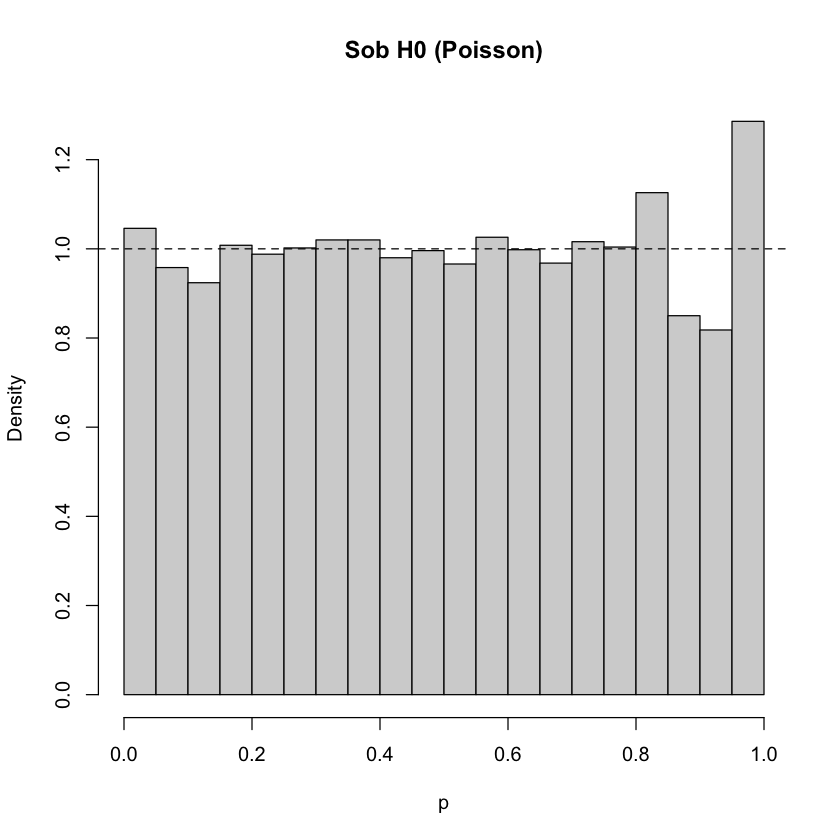

média(z) = 2.78  var(z) = 2.664925 


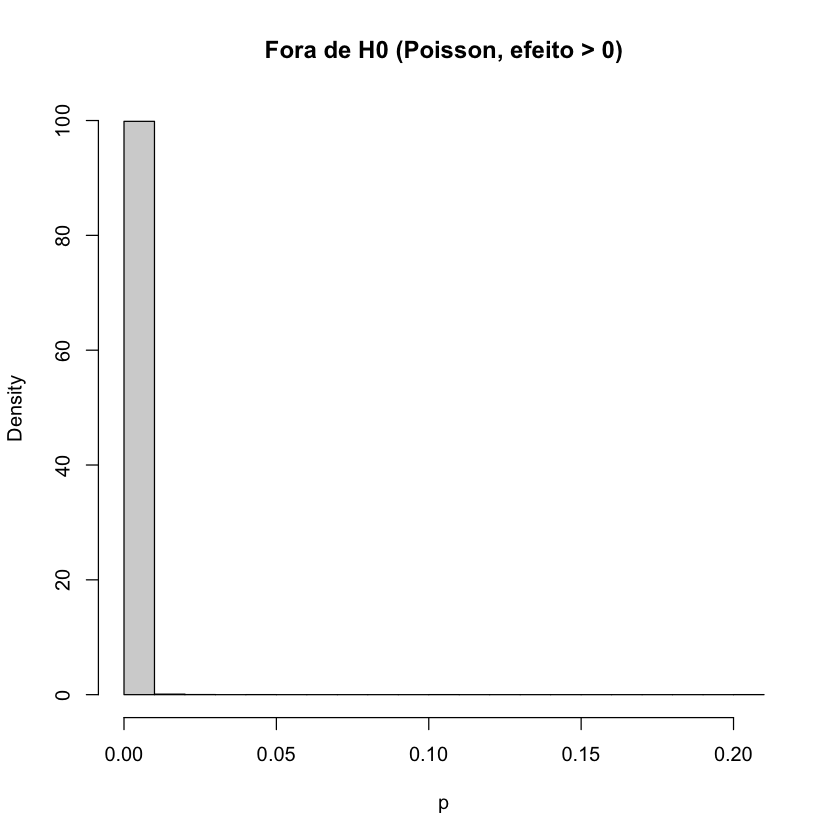

média(z) = 1.97  var(z) = 3.727739 


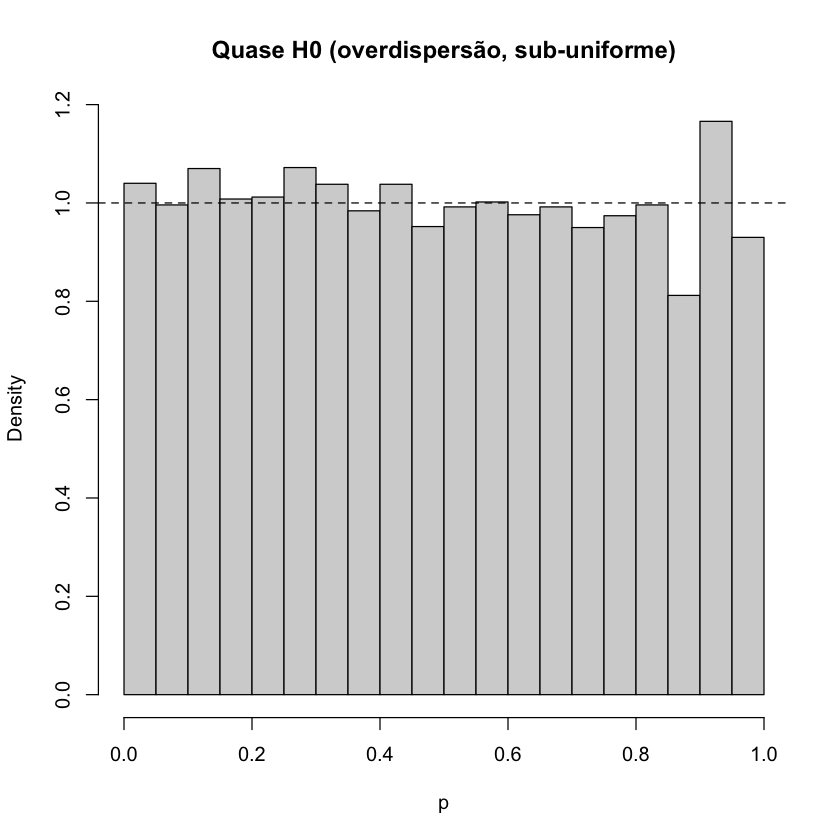

In [ ]:
# ================================================================
# Simulação em Poisson — estrutura da aula (valor-p via qui-quadrado)
# ================================================================

set.seed(123)

# -----------------------------
# S O B   H 0  (p ~ U(0,1))
# -----------------------------
n = 200
theta0 = 2
M = 10000

valorp = numeric()
for (i in 1:M) {
  z = rpois(n, theta0)
  TH = n * (mean(z) - theta0)^2 / var(z)
  valorp[i] = 1 - pchisq(TH, 1)
}

par(mfrow=c(1,1))
hist(valorp, prob=TRUE, main="Sob H0 (Poisson)", xlab="p")
abline(h=1, lty=2)         # referência da U(0,1)
cat("média(z) =", mean(z), " var(z) =", var(z), "\n")
# teste formal de uniformidade (opcional)
# ks.test(valorp, "punif")


# ------------------------------------
# FORA   DE   H0  
# ------------------------------------
n = 200
theta0 = 2
delta = 0.6       # diferença em relação a H0
M = 10000

valorp = numeric()
for (i in 1:M) {
  z = rpois(n, theta0 + delta)      # gera sob alternativa
  TH = n * (mean(z) - theta0)^2 / var(z)   # ainda testando H0: theta = theta0
  valorp[i] = 1 - pchisq(TH, 1)
}

hist(valorp, prob=TRUE, main="Fora de H0 (Poisson, efeito > 0)", xlab="p")
cat("média(z) =", mean(z), " var(z) =", var(z), "\n")
# aqui o histograma concentra perto de 0  -> poder do teste


# ------------------------------------------------------------
# Q U A S E   H 0  M A S   M O D E L O   E R R A D O
# (overdispersão: dados ~ NegBin com média theta0, mas testamos como Poisson)
# -> p tende a ficar 'maior' (sub-uniforme, conservador)
# ------------------------------------------------------------
n = 200
theta0 = 2
k = 3             # parâmetro de dispersão (var = mu + mu^2/k)
M = 10000

valorp = numeric()
for (i in 1:M) {
  z = rnbinom(n, size=k, mu=theta0)  # gera com overdispersão (não-Poisson)
  TH = n * (mean(z) - theta0)^2 / var(z)   # mesma estatística da aula
  valorp[i] = 1 - pchisq(TH, 1)            # seguimos calculando como se fosse Poisson
}

hist(valorp, prob=TRUE, main="Quase H0 (overdispersão, sub-uniforme)", xlab="p")
abline(h=1, lty=2)
cat("média(z) =", mean(z), " var(z) =", var(z), "\n")
# ks.test(valorp, "punif")   # tende a rejeitar uniformidade (conservador)

In [3]:
# ================================================================
# Simulação de valor-p (Poisson) — 3 cenários: dentro e fora de H0
# ================================================================

set.seed(123)

# ---------------------------------------------------------------
# Função: simula um cenário e calcula o valor-p
# ---------------------------------------------------------------
simular_poisson = function(n, theta_real, theta0, alpha = 0.05) {
  # Gera amostra sob Poisson com média = theta_real
  z = rpois(n, lambda = theta_real)

  # Estatística de teste (qui-quadrado com 1 gl)
  Tn = n * (mean(z) - theta0)^2 / var(z)

  # Valor-p sob H0
  p_valor = 1 - pchisq(Tn, df = 1)

  # Decisão
  decisao = ifelse(p_valor < alpha, "Rejeita H0", "Não rejeita H0")

  # Retorna resultados
  data.frame(
    valor_p = round(p_valor, 4),
    decisao = decisao,
    theta_estimado = round(mean(z), 4),
    theta_real = theta_real
  )
}

# ---------------------------------------------------------------
# Função principal: roda 3 cenários (1 sob H0 e 2 fora de H0)
# ---------------------------------------------------------------
simular_tres_cenarios = function(n = 200, theta0 = 2, alpha = 0.05) {
  # Define os três valores reais de theta
  theta_reais = c(theta0, theta0 + 0.3, theta0 + 1.0)
  nomes = c("Cenário A (H0 verdadeira)",
            "Cenário B (H0 falsa - efeito fraco)",
            "Cenário C (H0 falsa - efeito forte)")

  # Executa cada cenário com lapply
  resultados = mapply(function(theta, nome) {
    simular_poisson(n, theta, theta0, alpha)
  }, theta_reais, nomes, SIMPLIFY = FALSE)

  # Junta tudo em uma tabela final
  tabela = do.call(rbind, resultados)
  rownames(tabela) = nomes
  return(tabela)
}

# ---------------------------------------------------------------
# Execução da simulação
# ---------------------------------------------------------------
tabela_resultados = simular_tres_cenarios(n = 200, theta0 = 2, alpha = 0.05)

# Exibe resultados formatados
print(noquote(tabela_resultados))

                                    valor_p        decisao theta_estimado
Cenário A (H0 verdadeira)            0.6756 Não rejeita H0          2.040
Cenário B (H0 falsa - efeito fraco)  0.0095     Rejeita H0          2.290
Cenário C (H0 falsa - efeito forte)  0.0000     Rejeita H0          3.035
                                    theta_real
Cenário A (H0 verdadeira)                  2.0
Cenário B (H0 falsa - efeito fraco)        2.3
Cenário C (H0 falsa - efeito forte)        3.0


In [38]:
# ================================================================
# Exemplos numéricos — Teste de hipótese Poisson (valor-p)
# ================================================================

set.seed(123)

# Parâmetros fixos
n = 1000
theta0 = 2
alpha = 0.05

# ---------------------------------------------------------------
# Função que gera amostra, calcula Tn e valor-p
# ---------------------------------------------------------------
teste_poisson = function(H0) {
  
  # Gera amostra sob o parâmetro verdadeiro θ₀
  z = rpois(n, lambda = theta0)
  
  # Estatística de teste (razão qui-quadrado)
  Tn = n * (mean(z) - H0)^2 / var(z)
  
  # Valor-p sob H0
  p_valor = 1 - pchisq(Tn, df = 1)
  
  # Decisão
  decisao = ifelse(p_valor < alpha, "Rejeita H0", "Não rejeita H0")
  
  # Retorna resultados
  data.frame(
    hipotese_nula=H0,
    valor_p = p_valor,
    decisao = decisao,
    theta_estimado = mean(z),
    theta_real = theta0
  )
}

# --------------------------------
# Cenário A — H0 exata
# --------------------------------
H0_A = 2.0
resultado_A = teste_poisson(H0_A)

# --------------------------------
# Cenário B — H0 com pouco desvio
# --------------------------------
H0_B = 2.06
resultado_B = teste_poisson(H0_B)

# --------------------------------
# Cenário C — H0 com muito desvio
# --------------------------------
H0_C = 2.3
resultado_C = teste_poisson(H0_C)

# Junta os resultados
resumo_resultados = rbind(
  "Cenário A (H0 exato)"           = resultado_A,
  "Cenário B (H0 com pouco desvio)" = resultado_B,
  "Cenário C (H0 com muito desvio)" = resultado_C
)

# Arredonda apenas as colunas numéricas
resumo_resultados[, sapply(resumo_resultados, is.numeric)] =
  round(resumo_resultados[, sapply(resumo_resultados, is.numeric)], 4)

# Formata e imprime o resultado
noquote(resumo_resultados)


,hipotese_nula,valor_p,decisao,theta_estimado,theta_real
,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
Cenário A (H0 exato),2.00,0.8928,Não rejeita H0,1.994,2
Cenário B (H0 com pouco desvio),2.06,0.1096,Não rejeita H0,1.989,2
Cenário C (H0 com muito desvio),2.30,0.0000,Rejeita H0,1.991,2
